In [ ]:
# code ref: https://deepxde.readthedocs.io/en/latest/demos/pinn_forward/heat.html?highlight=heat%20equation#problem-setup

In [1]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
a = 0.4
L = 1
n = 1

In [3]:
geom = dde.geometry.Interval(0, L)
timedomain = dde.geometry.TimeDomain(0, n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [4]:
def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t - a * dy_xx

In [5]:
#bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 2*x[:, 0:1], lambda _, on_boundary: on_boundary)

ic = dde.icbc.IC(
    geomtime,
    lambda x: np.sin(n * np.pi * x[:, 0:1] / L),
    lambda _, on_initial: on_initial,
)

In [6]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    num_test=2540,
)

In [7]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")

In [8]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.029545 s



C:\Users\mecha\AppData\Local\Programs\Python\Python39\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.203035 s



In [9]:
losshistory, train_state = model.train(iterations=15000)

Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.15e-02, 2.40e+00, 6.60e-01]    [7.00e-02, 2.40e+00, 6.60e-01]    []  
1000      [9.36e-03, 5.94e-02, 1.38e-01]    [7.41e-03, 5.94e-02, 1.38e-01]    []  
2000      [6.58e-03, 3.64e-02, 2.77e-02]    [4.68e-03, 3.64e-02, 2.77e-02]    []  
3000      [3.79e-03, 2.53e-02, 1.78e-02]    [2.06e-03, 2.53e-02, 1.78e-02]    []  
4000      [3.49e-03, 2.08e-02, 1.33e-02]    [2.15e-03, 2.08e-02, 1.33e-02]    []  
5000      [2.70e-03, 1.75e-02, 1.18e-02]    [1.93e-03, 1.75e-02, 1.18e-02]    []  
6000      [2.45e-03, 1.54e-02, 1.07e-02]    [1.86e-03, 1.54e-02, 1.07e-02]    []  
7000      [2.13e-03, 1.37e-02, 1.00e-02]    [1.58e-03, 1.37e-02, 1.00e-02]    []  
8000      [1.75e-03, 1.25e-02, 9.50e-03]    [1.33e-03, 1.25e-02, 9.50e-03]    []  
9000      [2.18e-03, 1.11e-02, 8.76e-03]    [1.40e-03, 1.11e-02, 8.76e-03]    []  
10000     [1.78e-03, 1.02e-02, 8.00e-03]    [1.23e-03, 1.02e-

In [10]:
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.105828 s

Training model...

Step      Train loss                        Test loss                         Test metric
15000     [1.54e-03, 7.03e-03, 5.67e-03]    [1.08e-03, 7.03e-03, 5.67e-03]    []  
16000     [8.87e-04, 6.46e-04, 6.10e-04]    [8.87e-04, 6.46e-04, 6.10e-04]        
17000     [5.07e-04, 3.01e-04, 2.71e-04]    [5.07e-04, 3.01e-04, 2.71e-04]        
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.001020
  Number of iterations: 1990
  Number of functions evaluations: 2205
17205     [5.17e-04, 2.81e-04, 2.22e-04]    [3.76e-04, 2.81e-04, 2.22e-04]    []  

Best model at step 17205:
  train loss: 1.02e-03
  test loss: 8.79e-04
  test metric: []

'train' took 7.572932 s



Saving loss history to C:\Users\mecha\OneDrive\デスクトップ\main\Youtube_Videos_eng\2023_07_10_Video_2\loss.dat ...
Saving training data to C:\Users\mecha\OneDrive\デスクトップ\main\Youtube_Videos_eng\2023_07_10_Video_2\train.dat ...
Saving test data to C:\Users\mecha\OneDrive\デスクトップ\main\Youtube_Videos_eng\2023_07_10_Video_2\test.dat ...


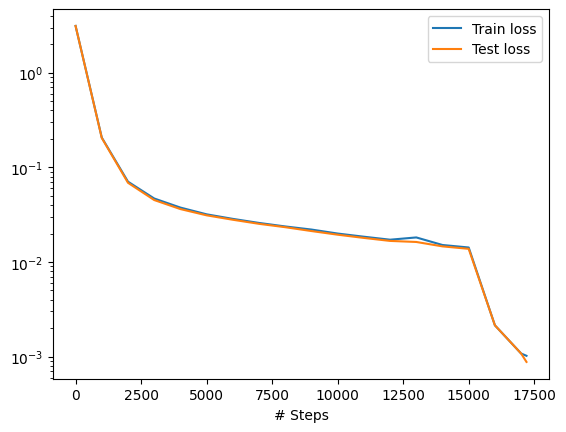

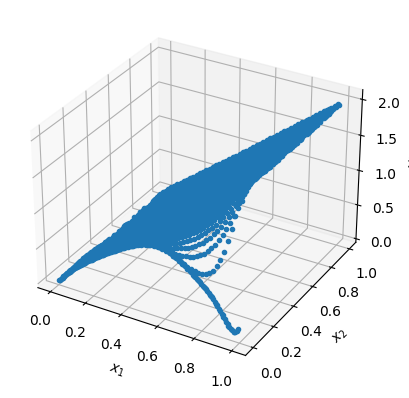

In [11]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)